In [1]:
import numpy as np
from tifffile import imread
import matplotlib.pyplot as plt
from ome_types import from_tiff

In [2]:
paths = {
    'topacio70':('/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/840047_0070.ome.tif', 1000),
    'topacio128':('/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/840153_0128.ome.tif', 600),
    'sardana':('/Volumes/T7 Shield/cylinter_input/sardana-097/tif/WD-76845-097.ome.tif', 1000),
    'codex1':('/Volumes/My Book/cylinter_input/CODEX/tif/sample_1.ome.tif', 200),
    'codex2':('/Volumes/My Book/cylinter_input/CODEX/tif/sample_2.ome.tif', 1300),
    'emit':('/Volumes/My Book/T7_overflow/cylinter_input/emit22_full/tif/1.ome.tif', 200),
    'mihc': ('/Volumes/My Book/cylinter_input/mIHC/tif/sample_1.ome.tif', 30),
}

/Users/greg/venvs/cylinter_test/lib/python3.11/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


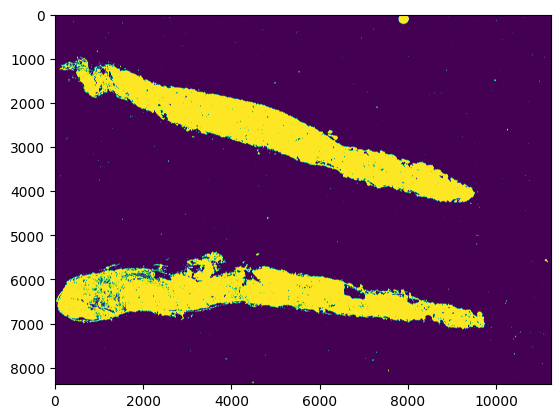

Pixel size of topacio70 is 0.65 with an estimated area of 13759371 sq. pixels


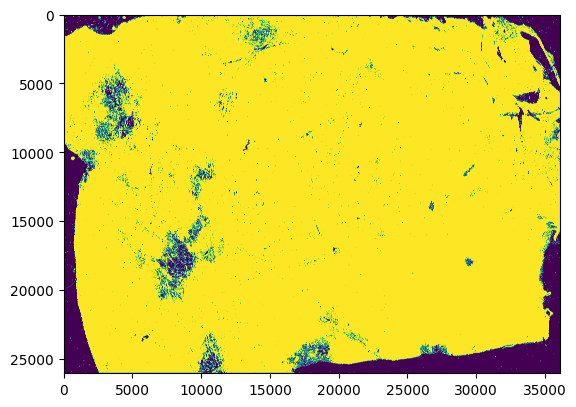

Pixel size of topacio128 is 0.65 with an estimated area of 843117841 sq. pixels


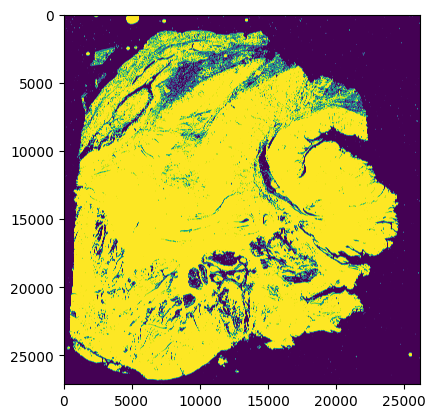

Pixel size of sardana is 0.65 with an estimated area of 407938809 sq. pixels


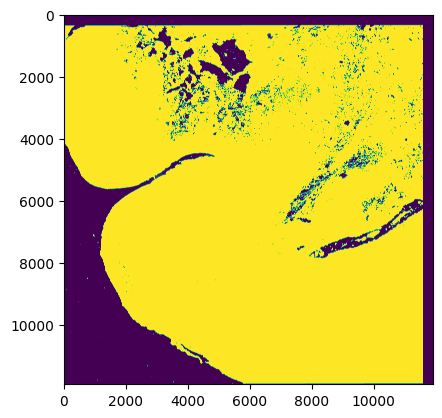

Pixel size of codex1 is 0.65 with an estimated area of 112253249 sq. pixels


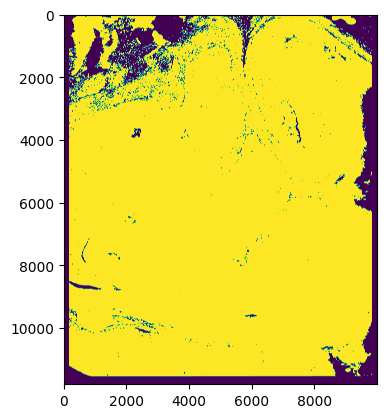

Pixel size of codex2 is 0.65 with an estimated area of 102727825 sq. pixels


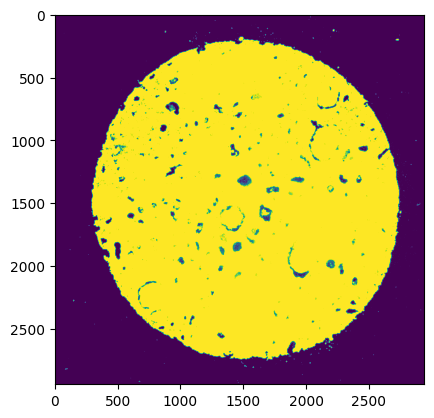

Pixel size of emit is 0.65 with an estimated area of 4763349 sq. pixels


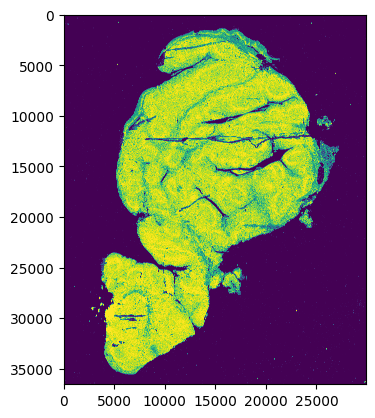

Pixel size of mihc is 0.5 with an estimated area of 366113803 sq. pixels


In [3]:
for name, data in paths.items():
    path = data[0]
    cutoff = data[1]
    ome = from_tiff(path)
    im = imread(path, key=0)
    binary = (im > cutoff).astype(int)
    plt.imshow(binary)
    plt.show()
    pixel_size = round(ome.images[0].pixels.physical_size_x, 2)
    if name == 'mihc':
        pixel_size = 0.5
    count_ones = np.count_nonzero(binary == 1)
    print(
        f'Pixel size of {name} is {pixel_size} with an estimated area of {count_ones} sq. pixels'
    )